# 1. Задание, которое в форме для ДЗ - из исходной таблицы требуется удалить строки данных, содержащие попуски, NaN, прочерки и т.д. Столбец Date разделить на три столбца (день, месяц, год), аналогично поступить со столбцом Time (минуты, секунды). Данные в столбце wind_speed_2 оставить только в м/с. В остальных столбцах оставить только числовые данные без лишних символов.

---

После выполнения работы был замечены некоторые недостатки исходной таблицы:

1. Показания влажности отрицательные;
2. В некоторых ячейках отсутсвует показание в м/с;
3. Была другая задача с исходной таблицей (в задании надо было разделить два стоблца Date и Time, а в таблице всё находилось в столбце Date);
4. При загрузки таблицы в Colab проценты перевелись в числовое соотношение процента от 0 до 1.

Данные недостатки были учтены в данном коде.

---

In [ ]:
# Для использования данных из Drive
from google.colab import drive

#Для работы с данными
import pandas as pd
import numpy as np

#Для визуализации
import matplotlib.pyplot as plt
import seaborn as sn

#Для моделей регрессии
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures as poly
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor

#Для разделения данных на выборки
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

#Для оценивания прогноза (метрики точности)
import sklearn.metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import max_error

#PATH = '/content/drive/MyDrive/Colab Notebooks/s10.xlsx';
#drive.mount('/content/drive');

PATH = '/content/s10.xlsx';

def clear_data(path):

  rew_data = pd.read_excel(path, na_values=['?', '-', ' ', '_', '–',], header = 0);

  data = rew_data.copy();

  data[['DMY', 'HM']] = data['Date'].str.split(' ', 1, expand = True);

  data['Day'] = data['DMY'].str.split('.', expand = True)[0];
  data['Month'] = data['DMY'].str.split('.', expand = True)[1];
  data['Year'] = data['DMY'].str.split('.', expand = True)[2];

  data['Hour'] = data['HM'].str.split(':', expand=True)[0];
  data['Minute'] = data['HM'].str.split(':', expand=True)[1];

  data['Wind_speed'] = data['Wind_speed'].str.split('/', expand = True)[2];

  date = data.replace(['?', '-', ' ', '  ', '   ', '_', '–'], np.nan, inplace = True);
  data = data.dropna(axis=0);

  data = data.replace("[^\d\.]", "", regex = True);

  data["Humidity"] = abs(data.Humidity.astype(float) * 100);

  data = data.drop(labels = ['DMY' ,'HM'], axis=1);

  data_cleared = data.reindex(columns=['Day', 'Month', 'Year', 'Hour', 'Minute',
                                       'Day_number', 'Temp', 'Temp_2', 'Humidity', 'Visibility',
                                       'Lightness', 'Wind_speed',  'Solar_ang_1']);

  convert_dict = {"Day": int, "Month": int, "Year": int, "Hour": int, "Minute": int, "Day_number": int,
                  "Temp": float, "Temp_2": float, "Humidity": float, "Visibility": float, "Lightness": float, "Wind_speed": float, "Solar_ang_1": float};
  data_cleared = data_cleared.astype(convert_dict);

  data_cleared.to_excel('/content/s10_cleared_with_old_index.xlsx');

  data_cleared = data_cleared.reset_index(drop = True);
  data_cleared.to_excel('/content/s10_cleared_with_new_index.xlsx');

  data_cleared.to_excel('/content/s10_cleared_without_index.xlsx', index = False);

  print(f'\tФорматы в таблице:\n{data_cleared.dtypes}\n');

  return data_cleared;

print(f'\tРезультат фильтрации входных данных: \n{clear_data(PATH)}\n')

	Форматы в таблице:
Day              int64
Month            int64
Year             int64
Hour             int64
Minute           int64
Day_number       int64
Temp           float64
Temp_2         float64
Humidity       float64
Visibility     float64
Lightness      float64
Wind_speed     float64
Solar_ang_1    float64
dtype: object

	Результат фильтрации входных данных: 
    Day  Month  Year  Hour  Minute  Day_number  Temp  Temp_2  Humidity  \
0    23     11  2015     0       0         327  0.45     1.0      99.0   
1    23     11  2015     0      30         327  0.25     1.0      87.0   
2    23     11  2015     1       0         327 -0.12     1.0      87.0   
3    23     11  2015     1      30         327  0.25     1.0      99.0   
4    23     11  2015     2       0         327  0.17     0.0      87.0   
..  ...    ...   ...   ...     ...         ...   ...     ...       ...   
83   26     11  2015     3      30         330 -1.29     3.0      93.0   
84   26     11  2015     4       0 


#2. Задание, которое в форме для ДЗ - к очищенным данным применить базовые модели регресии, которые были рассмотрены на занятии (линейная и полиномиальная регрессия, метод ближайших соседей). Предварительно данные разделить на массивы признаков и целевой переменной, выделить обучающую и тестовую выборки. Изменяя входные параметры (степень полинома, число соседей, соотношение обучающей и тестовой выборок и т.д), убедиться в изменении получаемого прогноза (изменении его метрик точности).
---


In [ ]:
#drive.mount('/content/drive');
#PATH = '/content/drive/MyDrive/Colab Notebooks/s10_cleared_without_index.xlsx';
PATH = '/content/s10_cleared_without_index.xlsx';
test_data = pd.read_excel(PATH);
data = pd.DataFrame(data = test_data);

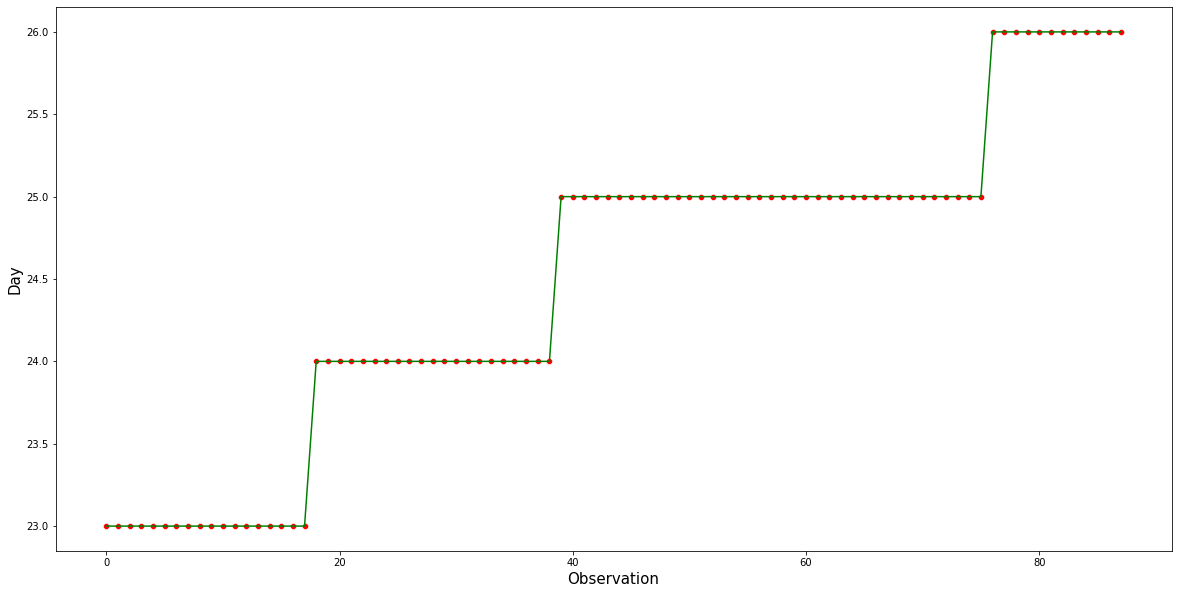

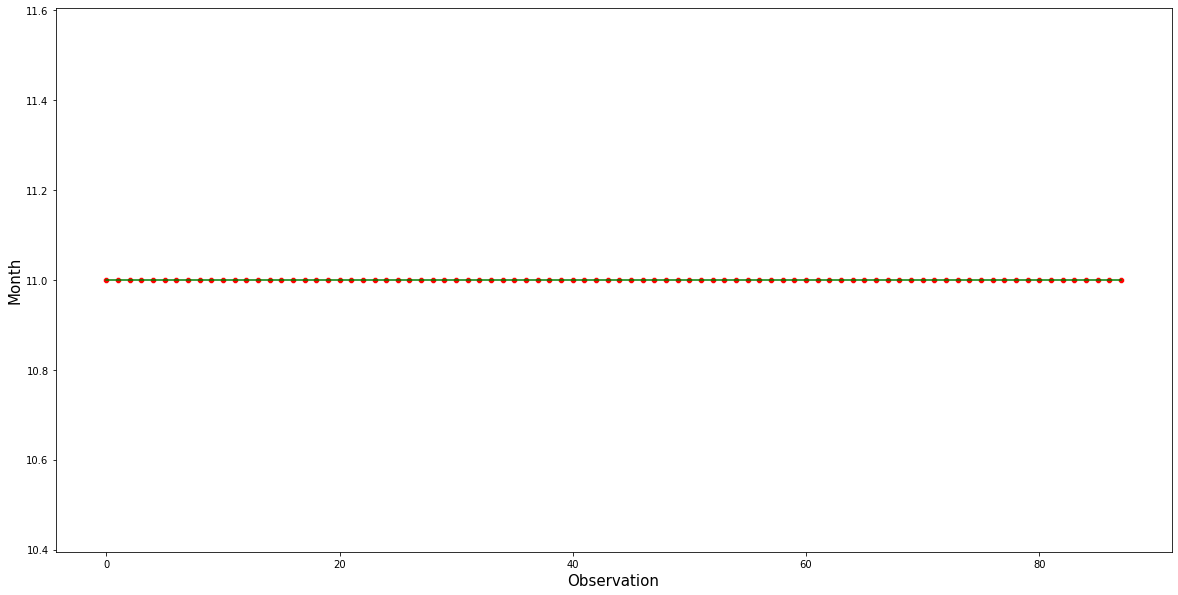

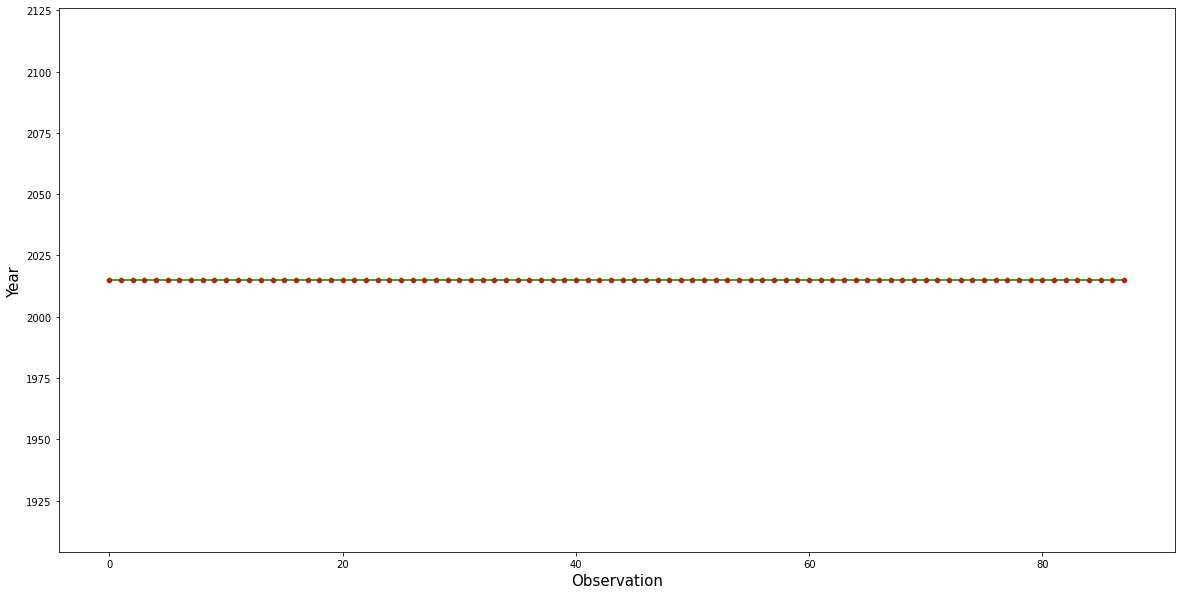

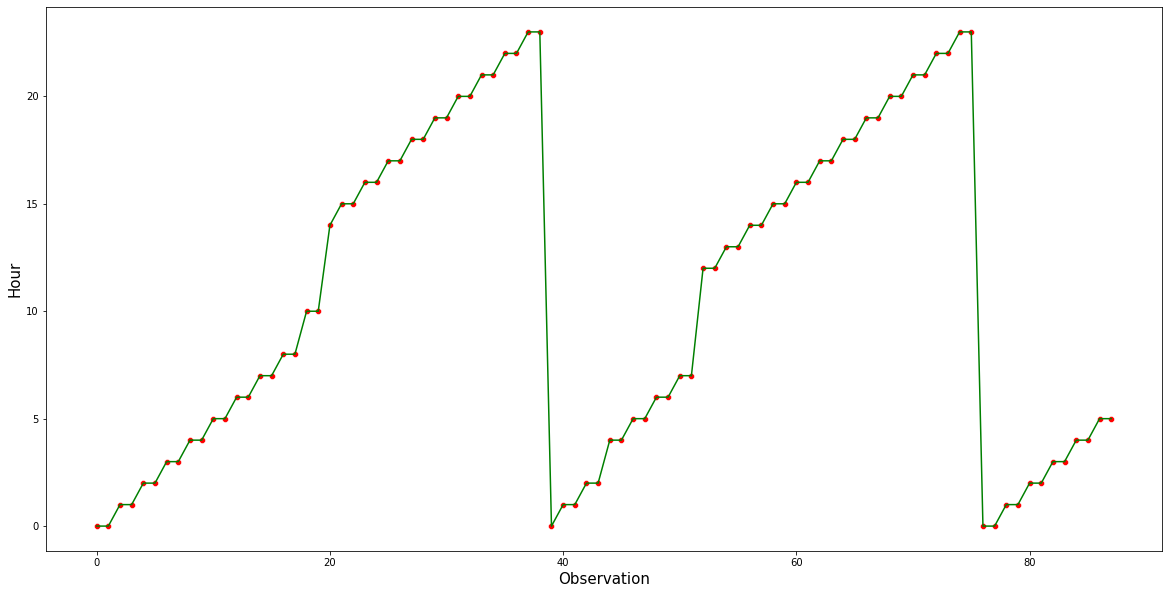

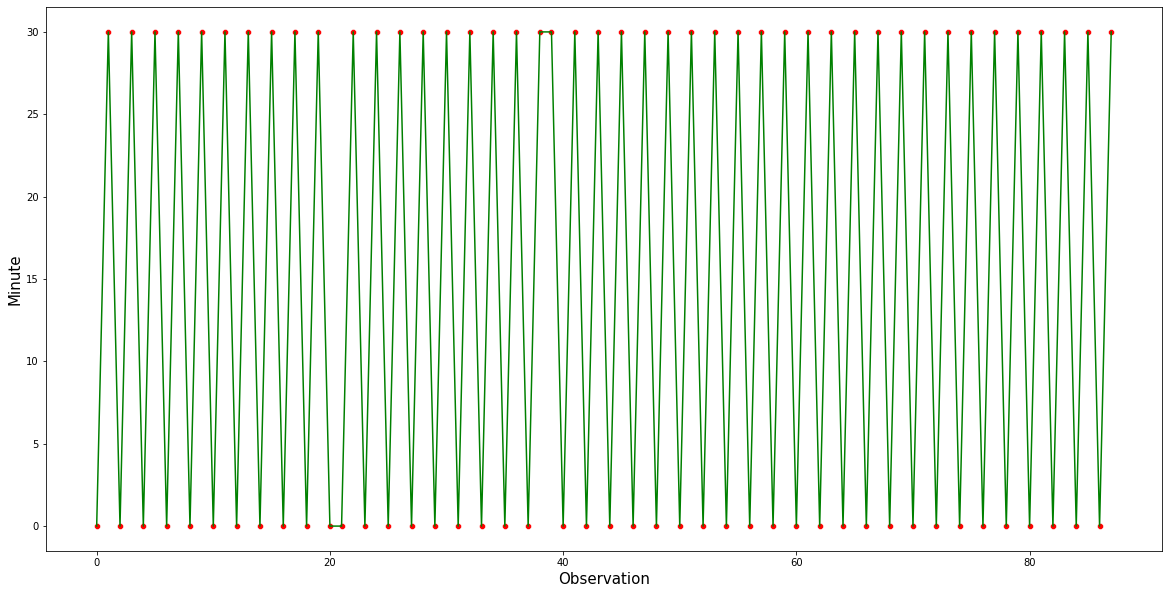

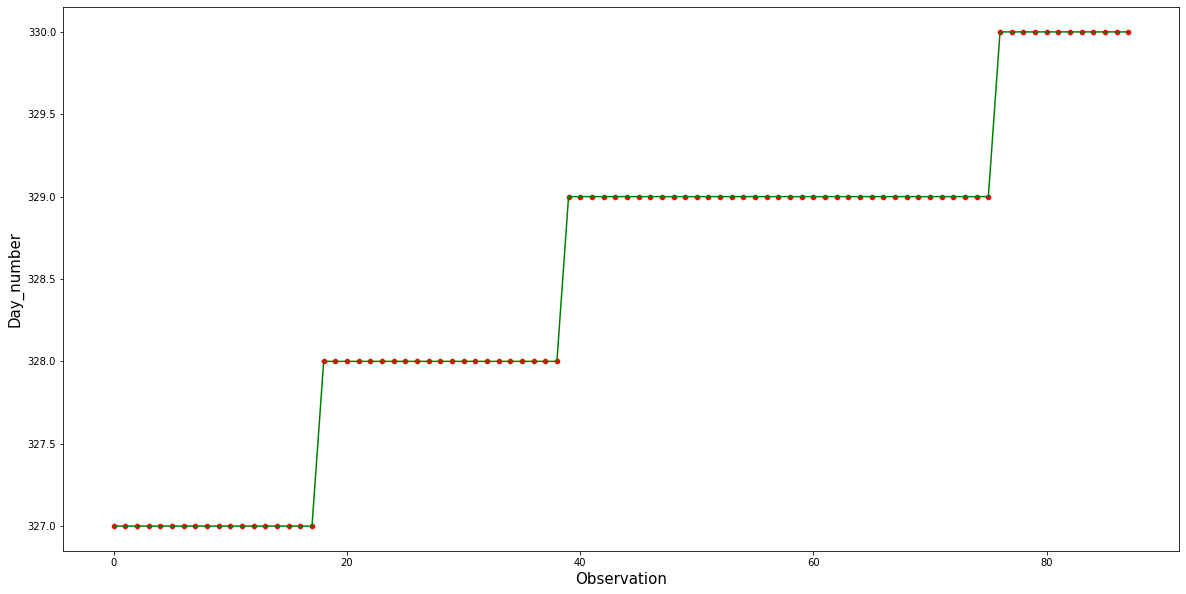

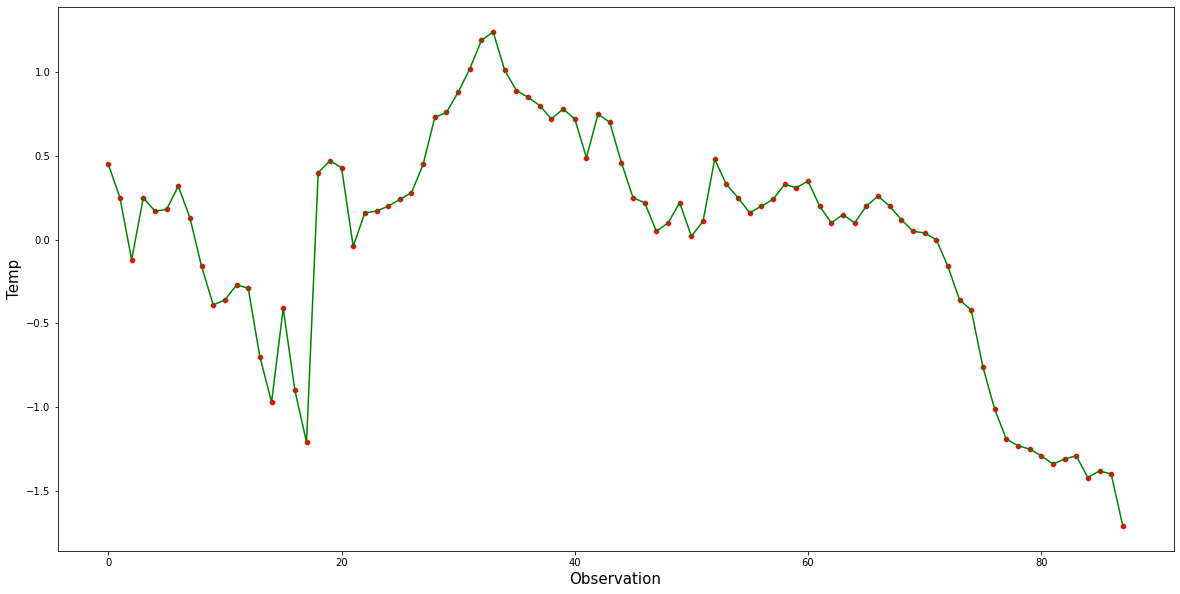

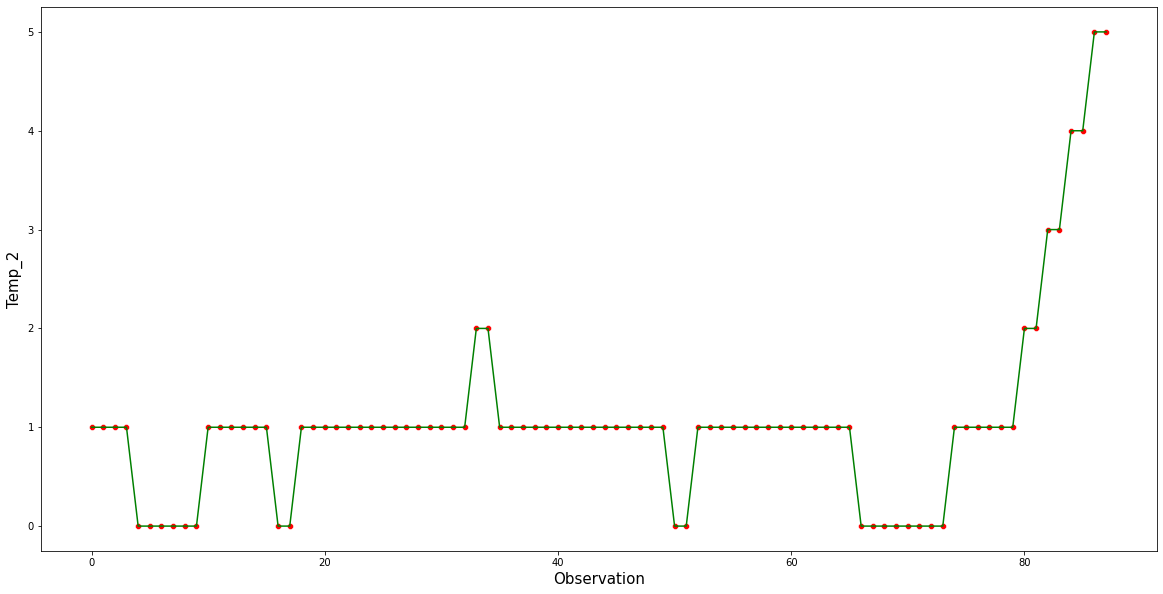

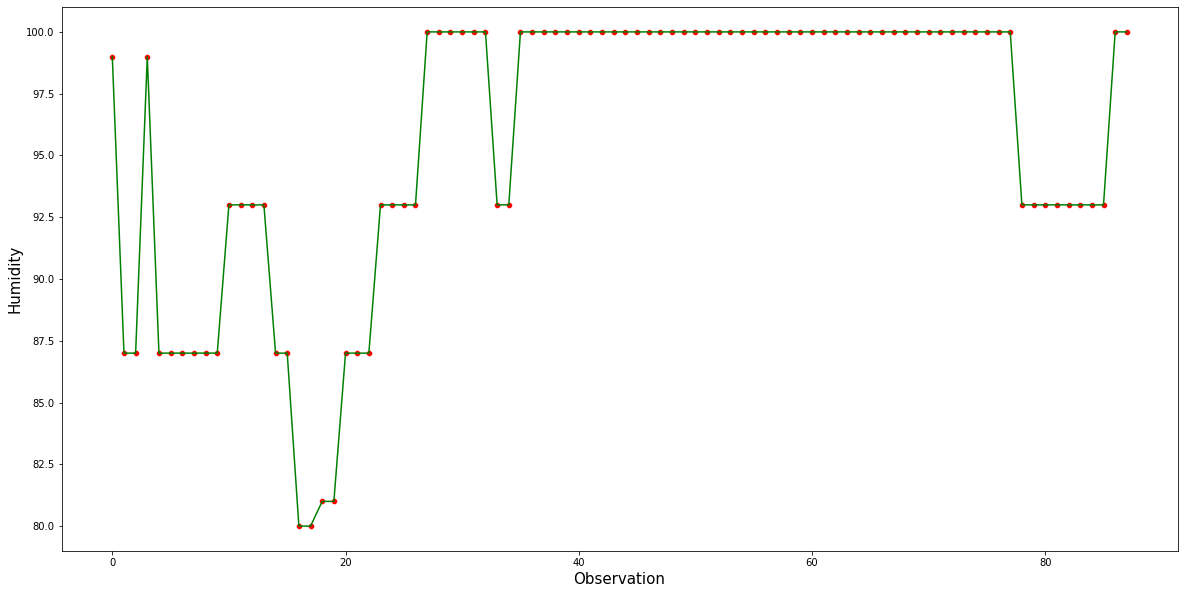

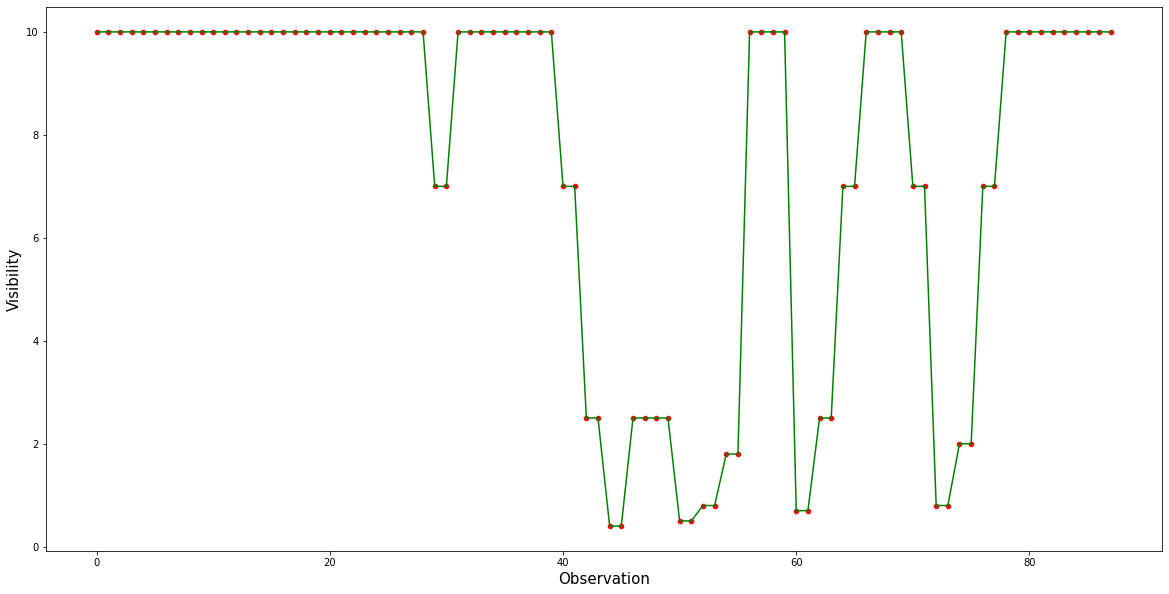

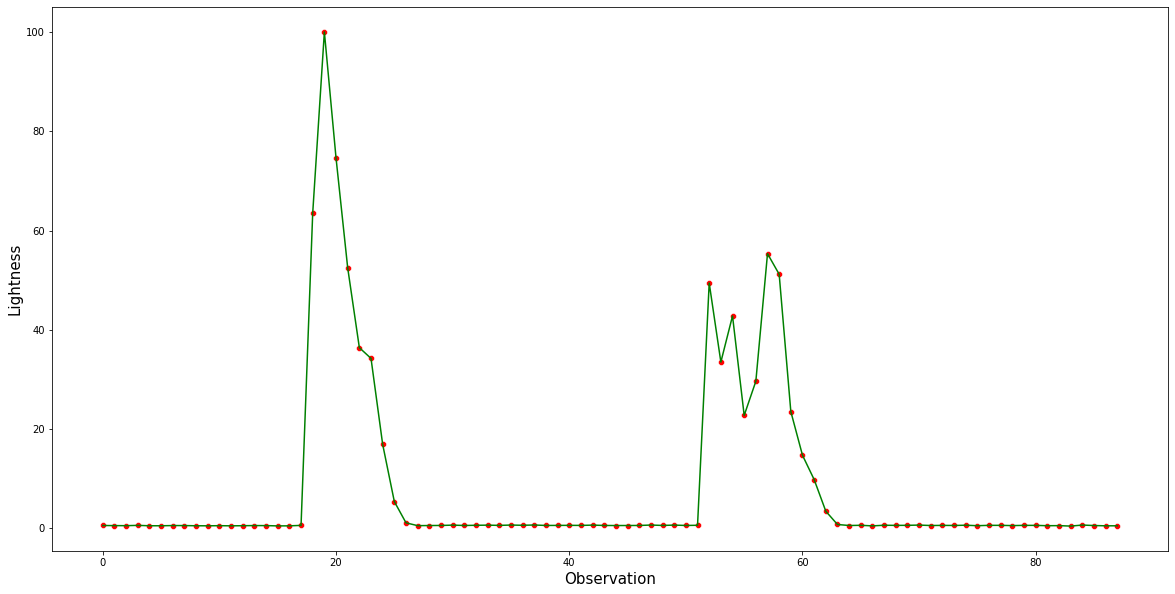

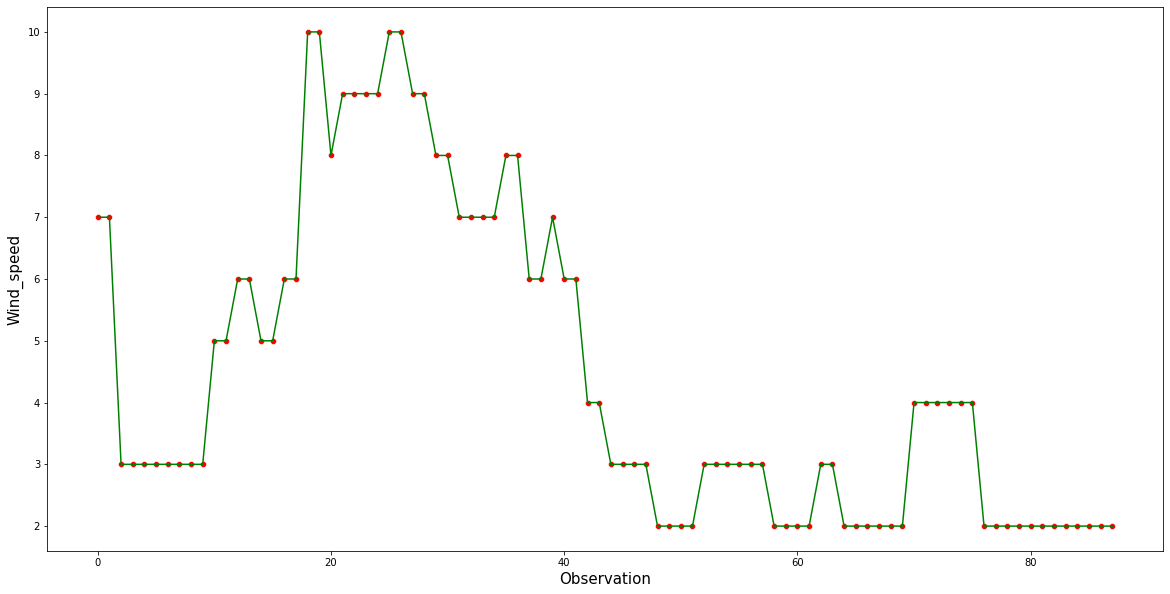

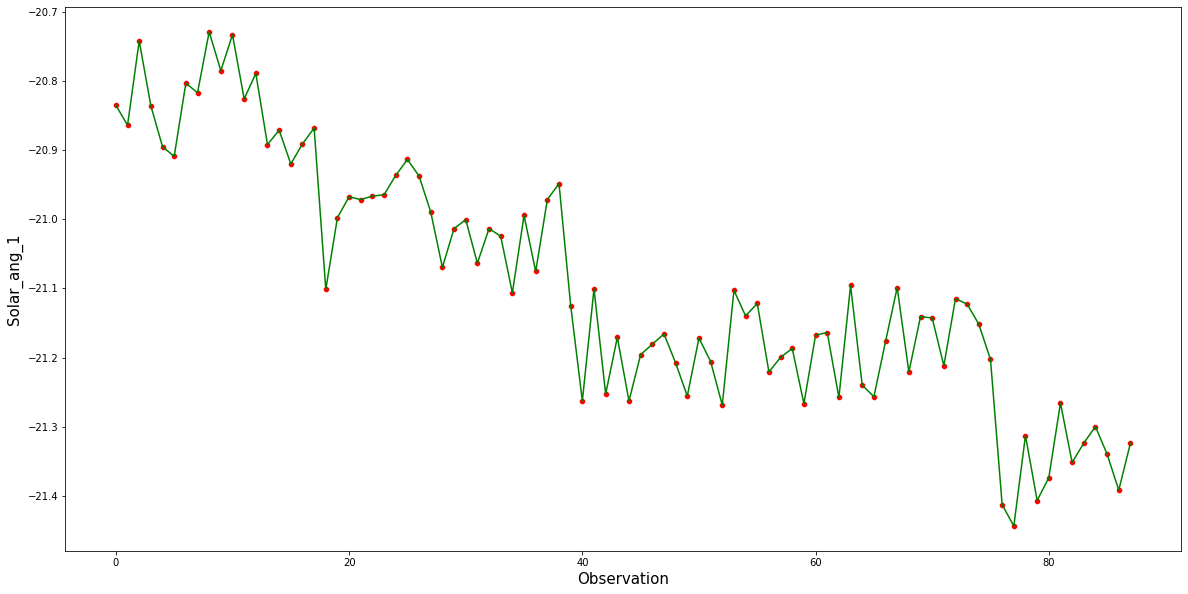

In [ ]:
for column in data:
  plt.figure(figsize = (20,10));
  sn.scatterplot(y = data[column], x = data.index, color = 'red');
  sn.lineplot(y = data[column], x = data.index, color = 'green');
  plt.xlabel('Observation', fontsize = 15);
  plt.ylabel(column, fontsize = 15);

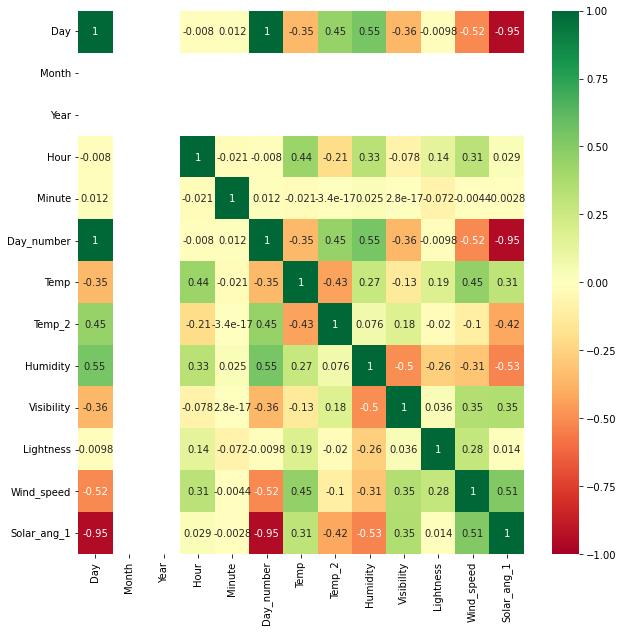

In [ ]:
plt.figure(figsize = (10, 10));
sn.heatmap(data.corr(), cmap = 'RdYlGn', vmax = 1, vmin = -1, annot = True);

In [ ]:
print(data.columns);

Index(['Day', 'Month', 'Year', 'Hour', 'Minute', 'Day_number', 'Temp',
       'Temp_2', 'Humidity', 'Visibility', 'Lightness', 'Wind_speed',
       'Solar_ang_1'],
      dtype='object')


In [ ]:
TARGET_TRAIN = 'Solar_ang_1';
TEST_SIZE = 0.10;
TARGET_DELETE = ['Day', 'Month', 'Year', 'Hour', 'Minute', 'Day_number'];

In [ ]:
X = data.drop([TARGET_TRAIN], axis = 1);
y = data[TARGET_TRAIN];

X_train, X_test, y_train, y_test  =  train_test_split(X,y, test_size  =  TEST_SIZE);
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

y_test.to_excel('/content/y_test.xlsx');
X_test.to_excel('/content/X_test.xlsx');
X_train = X_train.drop(TARGET_DELETE, axis = 1);
X_test = X_test.drop(TARGET_DELETE, axis = 1);

(79, 12) (9, 12) (79,) (9,)


In [ ]:
N_SPLITS_DEFAULT = 10;
DEGREE_DEFAULT =  2;
N_NEIGHBORS_DEFAULT = 4;

# 1. Модель линейной регрессии

In [ ]:
N_SPLITS_LINE = 0;

if N_SPLITS_LINE <= 0: N_SPLITS_LINE = N_SPLITS_DEFAULT;

lin_reg = LinearRegression();
lin_reg.fit(X_train, y_train);
scoring   =  {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           'Max': 'max_error'};
scores = cross_validate(lin_reg, X_train, y_train, scoring = scoring, cv = ShuffleSplit(n_splits = N_SPLITS_LINE));
y_pred = lin_reg.predict(X_test);

print('Cross-Validation errors');
DF_reg  =  pd.DataFrame(scores);
display(DF_reg);

print('Test errors');
print('Mean squared error on test_set: %.4f' % mse(y_test,y_pred));
print('R2  on test_set: %.4f' %  r2_score(y_test,y_pred));

Cross-Validation errors


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_Max
0,0.003603,0.003754,0.143842,-0.007092,-0.071413,-0.136510
1,0.002822,0.003092,0.686996,-0.014562,-0.106512,-0.209439
2,0.002786,0.012447,0.550995,-0.012705,-0.100067,-0.208113
3,0.003012,0.010264,0.271282,-0.008957,-0.086741,-0.157303
4,0.002725,0.002501,0.639408,-0.009233,-0.080965,-0.169446
5,0.009806,0.005194,-0.041559,-0.022540,-0.111650,-0.324309
6,0.002913,0.003021,0.288076,-0.010147,-0.074598,-0.196365
7,0.004387,0.003359,0.572332,-0.013838,-0.084902,-0.241775
8,0.003117,0.003116,0.720555,-0.007015,-0.065553,-0.192235
9,0.002898,0.010071,0.771885,-0.013594,-0.095198,-0.197621


Test errors
Mean squared error on test_set: 0.0148
R2  on test_set: 0.6205


# 2. Модель полиномиальной регрессии

In [ ]:
N_SPLITS_PINE = 0;
DEGREE_PINE = 0;

if N_SPLITS_PINE <= 0: N_SPLITS_PINE = N_SPLITS_DEFAULT;
if DEGREE_PINE <= 1: DEGREE_PINE = DEGREE_DEFAULT;

PF  =  poly(degree = DEGREE_PINE, include_bias = True, interaction_only = False);
#Rid = Ridge(alpha = 0.1);
LR = LinearRegression();
pipe = Pipeline([('polynomial_features', PF), ('lr', LR)])
pipe.fit(X_train, y_train);
scoring_pipe   =  {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           'Max': 'max_error'};
scores_pipe = cross_validate(pipe, X_train, y_train, scoring = scoring_pipe, cv = ShuffleSplit(n_splits = N_SPLITS_PINE));
y_pred_pipe = pipe.predict(X_test);

print('Cross-Validation error');
DF_reg_pipe  =  pd.DataFrame(scores_pipe);
display(DF_reg_pipe);

print('Test errors');
print('Mean squared error on test_set: %.4f' % mse(y_test,y_pred_pipe));
print('R2  on test_set: %.4f' %  r2_score(y_test,y_pred_pipe));

Cross-Validation error


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_Max
0,0.005625,0.003262,-0.116806,-0.016535,-0.091769,-0.234742
1,0.004233,0.003574,0.667799,-0.008675,-0.071277,-0.197035
2,0.004224,0.001894,-0.825475,-0.033984,-0.152957,-0.405678
3,0.003005,0.001886,0.443466,-0.012525,-0.089407,-0.194177
4,0.003146,0.001838,0.483086,-0.020759,-0.120984,-0.257244
5,0.003062,0.001908,0.589144,-0.012921,-0.093671,-0.193110
6,0.003014,0.001819,-0.244464,-0.023055,-0.126573,-0.304775
7,0.002938,0.002100,0.468929,-0.012072,-0.093982,-0.196255
8,0.003035,0.001900,-0.112328,-0.033094,-0.162741,-0.313372
9,0.003262,0.001981,-1.677687,-0.089799,-0.231494,-0.538961


Test errors
Mean squared error on test_set: 0.0379
R2  on test_set: 0.0267


# 3.Модель ближайших соседей (KNN)

In [ ]:
N_NEIGHBORS_KNN = 0;
N_SPLITS_KNN = 0;

if N_SPLITS_KNN <=  0: N_SPLITS_KNN = N_SPLITS_DEFAULT;
if N_NEIGHBORS_KNN <=  0: N_NEIGHBORS_KNN = N_NEIGHBORS_DEFAULT;

k_reg  =  KNeighborsRegressor(n_neighbors = N_NEIGHBORS_KNN, weights = 'distance');
k_reg.fit(X_train, y_train);
scoring_k   =  {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           'Max': 'max_error'};
scores_k = cross_validate(k_reg, X_train, y_train, scoring = scoring_k, cv = ShuffleSplit(n_splits = N_SPLITS_KNN));
y_pred_k = k_reg.predict(X_test);

print('Cross-Validation error');
DF_reg_k = pd.DataFrame(scores_k);
display(DF_reg_k);

print('Test errors');
print('Mean squared error on test_set: %.4f' % mse(y_test,y_pred_k));
print('R2  on test_set: %.4f' %  r2_score(y_test,y_pred_k));

Cross-Validation error


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_Max
0,0.002912,0.003775,0.776715,-0.010408,-0.079723,-0.201995
1,0.001765,0.002338,0.002038,-0.013342,-0.084579,-0.219717
2,0.001637,0.002344,0.743231,-0.007032,-0.074432,-0.145151
3,0.001598,0.002145,0.150975,-0.011589,-0.068671,-0.273557
4,0.001626,0.002136,-0.310769,-0.025828,-0.138125,-0.323237
5,0.001666,0.002204,0.829961,-0.005036,-0.052787,-0.168566
6,0.001642,0.002170,0.726743,-0.004012,-0.047792,-0.140584
7,0.001622,0.002160,0.784264,-0.006197,-0.062689,-0.175107
8,0.001577,0.002251,0.858303,-0.007428,-0.061672,-0.201995
9,0.001574,0.002248,0.864726,-0.003956,-0.054083,-0.103326


Test errors
Mean squared error on test_set: 0.0057
R2  on test_set: 0.8545


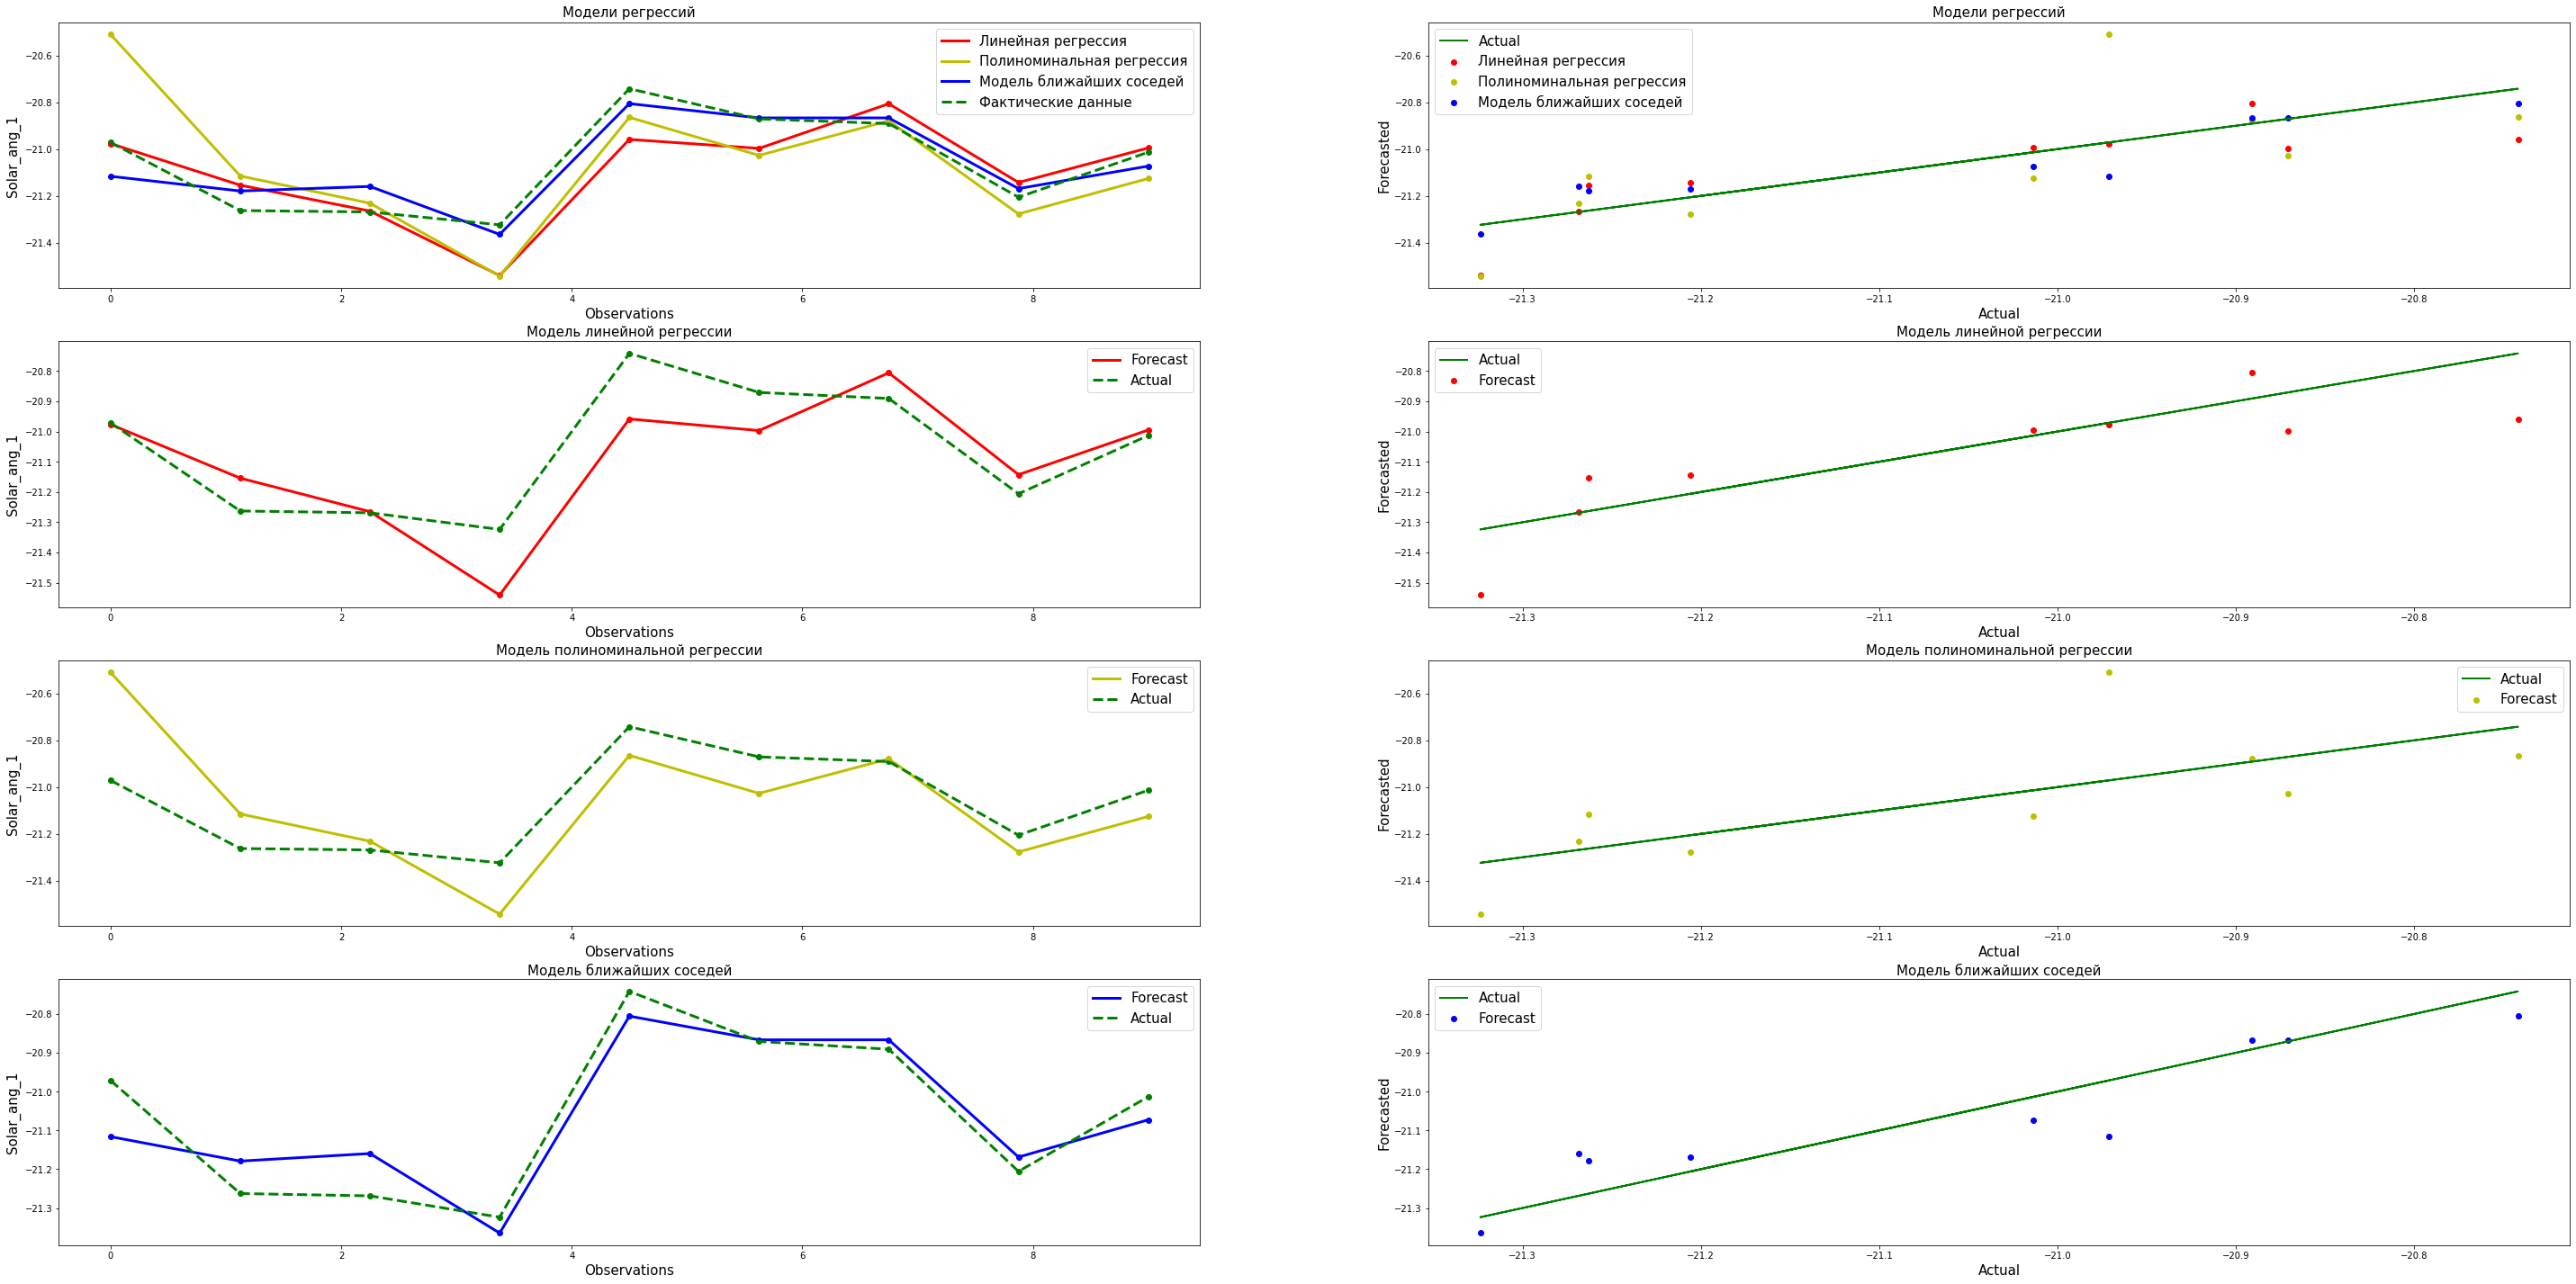

In [ ]:
x = np.linspace(0, X_test.shape[0], X_test.shape[0]);
plt.figure(figsize = (50,25));
plt.subplot(421);
plt.title('Модели регрессий', fontsize = 15);
plt.scatter(x, y_pred, c = 'r');
plt.scatter(x, y_pred_pipe, c = 'y');
plt.scatter(x, y_pred_k, c = 'b');
plt.scatter(x, y_test, c = 'g');
plt.plot(x, y_pred, '-r', linewidth = 3, label = 'Линейная регрессия');
plt.plot(x, y_pred_pipe, '-y', linewidth = 3, label = 'Полиноминальная регрессия');
plt.plot(x, y_pred_k, '-b', linewidth = 3, label = 'Модель ближайших соседей');
plt.plot(x, y_test, 'g--', linewidth = 3, label = 'Фактические данные');
plt.legend(fontsize = 15);
plt.xlabel('Observations', fontsize = 15);
plt.ylabel(TARGET_TRAIN, fontsize = 15);
plt.subplot(422);
plt.title('Модели регрессий', fontsize = 15);
plt.plot(y_test, y_test, '-g', linewidth = 2, label = 'Actual');
plt.scatter(y_test, y_pred, label = 'Линейная регрессия', c = 'r');
plt.scatter(y_test, y_pred_pipe, label = 'Полиноминальная регрессия', c = 'y');
plt.scatter(y_test, y_pred_k, label =  'Модель ближайших соседей', c = 'b');
plt.legend(fontsize = 15);
plt.xlabel('Actual', fontsize = 15);
plt.ylabel('Forecasted', fontsize = 15);

plt.subplot(423);
plt.title('Модель линейной регрессии', fontsize = 15);
plt.scatter(x, y_pred, c = 'r');
plt.scatter(x, y_test, c = 'g');
plt.plot(x, y_pred, '-r', linewidth = 3, label = 'Forecast');
plt.plot(x, y_test, 'g--', linewidth = 3, label = 'Actual');
plt.legend(fontsize = 15);
plt.xlabel('Observations', fontsize = 15);
plt.ylabel(TARGET_TRAIN, fontsize = 15);
plt.subplot(424);
plt.title('Модель линейной регрессии', fontsize = 15);
plt.plot(y_test, y_test, '-g', linewidth = 2, label = 'Actual');
plt.scatter(y_test, y_pred, label = 'Forecast', c = 'r');
plt.legend(fontsize = 15);
plt.xlabel('Actual', fontsize = 15);
plt.ylabel('Forecasted', fontsize = 15);

plt.subplot(425);
plt.title('Модель полиноминальной регрессии', fontsize = 15);
plt.scatter(x, y_pred_pipe, c = 'y');
plt.scatter(x, y_test, c = 'g');
plt.plot(x, y_pred_pipe, '-y', linewidth = 3, label = 'Forecast');
plt.plot(x, y_test, 'g--', linewidth = 3, label = 'Actual');
plt.legend(fontsize = 15);
plt.xlabel('Observations', fontsize = 15);
plt.ylabel(TARGET_TRAIN, fontsize = 15);
plt.subplot(426);
plt.title('Модель полиноминальной регрессии', fontsize = 15);
plt.plot(y_test, y_test, '-g', linewidth = 2, label = 'Actual');
plt.scatter(y_test, y_pred_pipe, label = 'Forecast', c = 'y');
plt.legend(fontsize = 15);
plt.xlabel('Actual', fontsize = 15);
plt.ylabel('Forecasted', fontsize = 15);

plt.subplot(427);
plt.title('Модель ближайших соседей', fontsize = 15);
plt.scatter(x, y_pred_k, c = 'b');
plt.scatter(x, y_test, c = 'g');
plt.plot(x, y_pred_k, '-b', linewidth = 3, label = 'Forecast');
plt.plot(x, y_test, 'g--', linewidth = 3, label = 'Actual');
plt.legend(fontsize = 15);
plt.xlabel('Observations', fontsize = 15);
plt.ylabel(TARGET_TRAIN, fontsize = 15);
plt.subplot(428);
plt.title('Модель ближайших соседей', fontsize = 15);
plt.plot(y_test, y_test, '-g', linewidth = 2, label = 'Actual');
plt.scatter(y_test, y_pred_k, label = 'Forecast', c = 'b');
plt.legend(fontsize = 15);
plt.xlabel('Actual', fontsize = 15);
plt.ylabel('Forecasted', fontsize = 15);
plt.savefig('saved_figure.png');
plt.show();

plt.figure(figsize = (10, 10));
sn.heatmap(data.corr(), cmap = 'RdYlGn', vmax = 1, vmin = -1, annot = True);